Enter city name to get forecast:  kolkata


Weather forecast for kolkata:


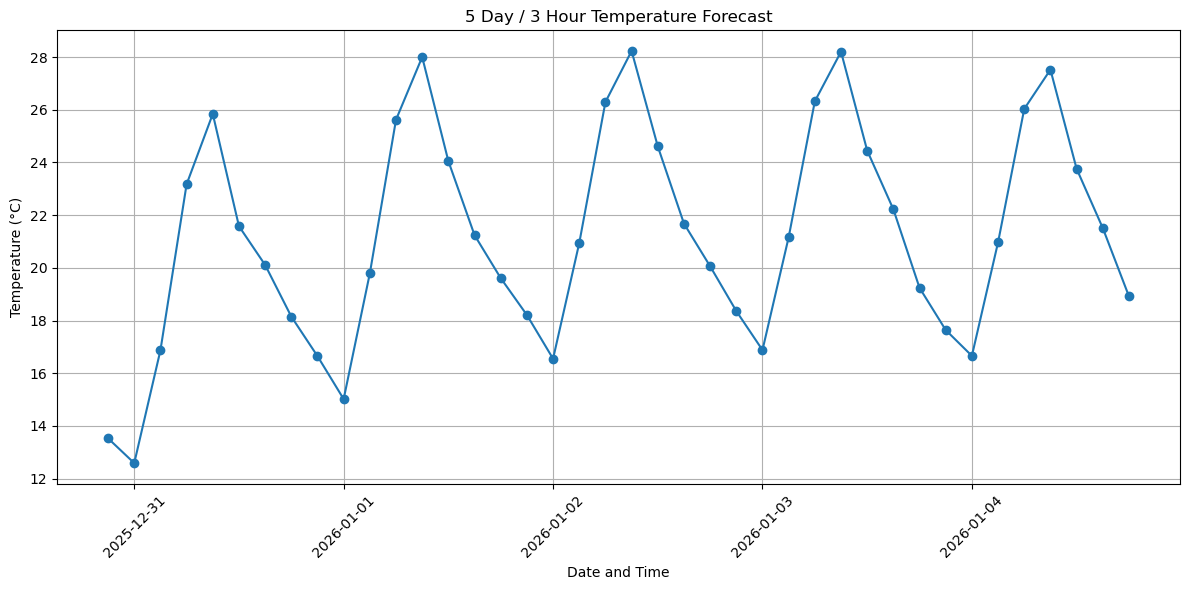

In [1]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime

# Replace with your OpenWeatherMap API key
API_KEY = "2488dec299523e9fff99ccf8fc612d7c"

def fetch_weather_forecast(city_name):
    """
    Fetch 5-day weather forecast data from OpenWeatherMap API for the specified city.
    Returns the API response as a JSON dictionary if successful, None otherwise.
    """
    # Define the base URL for the forecast API endpoint
    base_url = "http://api.openweathermap.org/data/2.5/forecast"
    # Parameters to send with the GET request
    params = {
        "q": city_name,          # City name provided by user
        "appid": API_KEY,        # Your unique API key
        "units": "metric"        # Use metric units for temperature (Celsius)
    }
    try:
        # Send a GET request to the API
        response = requests.get(base_url, params=params)
        # Raise an HTTPError if the response was unsuccessful
        response.raise_for_status()
        # Return the JSON content of the response
        return response.json()
    except requests.RequestException as e:
        # Handle connection errors, timeouts, or invalid responses
        print(f"Error fetching data: {e}")
        return None

def plot_temperature_forecast(forecast_data):
    """
    Parse forecast data and plot temperature over time using Matplotlib.
    """
    timestamps = []
    temperatures = []

    # Extract forecast entries from the API response
    for entry in forecast_data['list']:
        # Parse the timestamp string into a datetime object for plotting
        time = datetime.strptime(entry['dt_txt'], '%Y-%m-%d %H:%M:%S')
        temp = entry['main']['temp']  # Temperature in Celsius
        timestamps.append(time)
        temperatures.append(temp)

    # Set figure size for the plot
    plt.figure(figsize=(12, 6))
    # Plot temperature against time using a line plot with markers
    plt.plot(timestamps, temperatures, marker='o', linestyle='-', color='tab:blue')
    plt.title("5 Day / 3 Hour Temperature Forecast")   # Chart title
    plt.xlabel("Date and Time")                        # X-axis label
    plt.ylabel("Temperature (°C)")                     # Y-axis label
    plt.xticks(rotation=45)                            # Rotate x-axis labels for better readability
    plt.grid(True)                                     # Add gridlines for clarity
    plt.tight_layout()                                 # Adjust plot to fit elements properly
    plt.show()                                         # Display the plot

def main():
    """
    Main interactive function to get user input, fetch weather data, and display visualization.
    """
    city = input("Enter city name to get forecast: ")     # Prompt user for city name
    data = fetch_weather_forecast(city)                    # Retrieve forecast data
    if data and data.get('cod') == '200':
        print(f"Weather forecast for {city}:")
        plot_temperature_forecast(data)                    # Generate and show the temperature plot
    else:
        print("Failed to get weather data. Please check city name and API key.")

# Execute main function when the script is run directly
if __name__ == "__main__":
    main()